In [2]:
import sys
sys.path.append("/miniconda3/lib/python3.7/site-packages")

In [3]:
import PyAstronomy

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from PyAstronomy import pyasl


In [5]:
i,H1 = np.loadtxt('Hydrogen.txt', skiprows=13, unpack=True)
i,H2100 = np.loadtxt('H_int100ms.txt', skiprows=13, unpack=True)
i,H2125 = np.loadtxt('H_int125ms.txt', skiprows=13, unpack=True)
i,N1 = np.loadtxt('Neon.txt', skiprows=13, unpack=True)
i,N12 = np.loadtxt('Neon 2.txt', skiprows=13, unpack=True)
i,N2100 = np.loadtxt('Ne_int100ms.txt', skiprows=13, unpack=True)
i,U1100 = np.loadtxt('unknown 1.1.txt', skiprows=13, unpack=True)
i,U2100 = np.loadtxt('U1_int100ms.txt', skiprows=13, unpack=True)
i,Uu1100 = np.loadtxt('unknown 2.1.txt', skiprows=13, unpack=True)
i,Uu2100 = np.loadtxt('U2_int100ms.txt', skiprows=13, unpack=True)
i,Uu227 = np.loadtxt('U2_int27ms.txt', skiprows=13, unpack=True)
i,sun = np.loadtxt('Sun.txt', skiprows=13, unpack=True)


In [6]:
i,flu = np.loadtxt('fl_int94ms.txt', skiprows=13, unpack=True)
i,inc = np.loadtxt('incandescent 2.txt', skiprows=13, unpack=True)

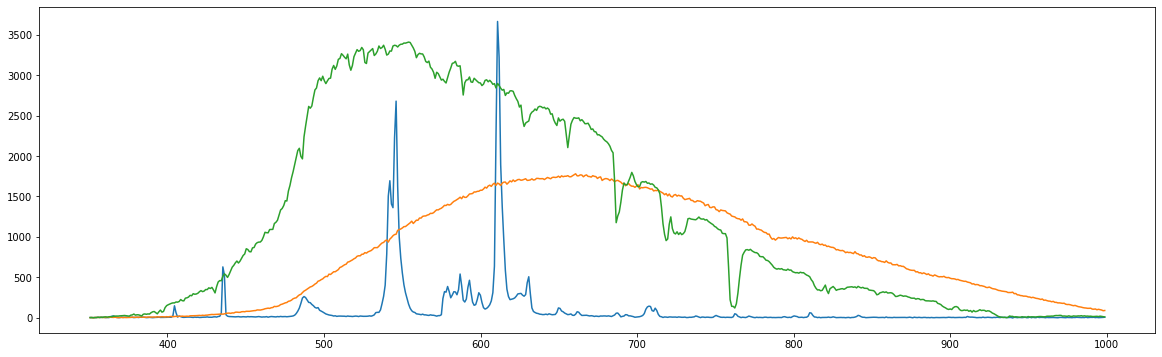

In [67]:
plt.figure(figsize=(20,6))
plt.plot(xcal,sun)
#for i in Hnm:
   # plt.axvline(i, label='H')
#plt.axvline(x=686.719)
#plt.axvline(x=759.370)
#plt.axvline(x=589.592)
#plt.axvline(x=518.362)
#plt.axvline(x=627.661)
#plt.legend()


Text(0.5, 0, 'Calibrated wavelength(nm)')

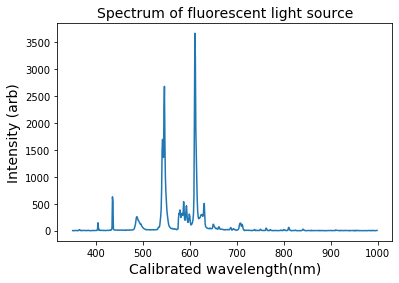

In [74]:
plt.plot(xcal,flu)
plt.title('Spectrum of fluorescent light source',size=14)
plt.ylabel('Intensity (arb)',size=14)
plt.xlabel('Calibrated wavelength(nm)',size=14)

Text(0.5, 0, 'Calibrated wavelength(nm)')

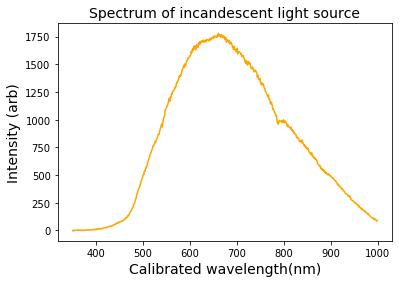

In [76]:
plt.plot(xcal,inc,c='orange')
plt.title('Spectrum of incandescent light source',size=14)
plt.ylabel('Intensity (arb)',size=14)
plt.xlabel('Calibrated wavelength(nm)',size=14)

Text(0.5, 0, 'Calibrated wavelength(nm)')

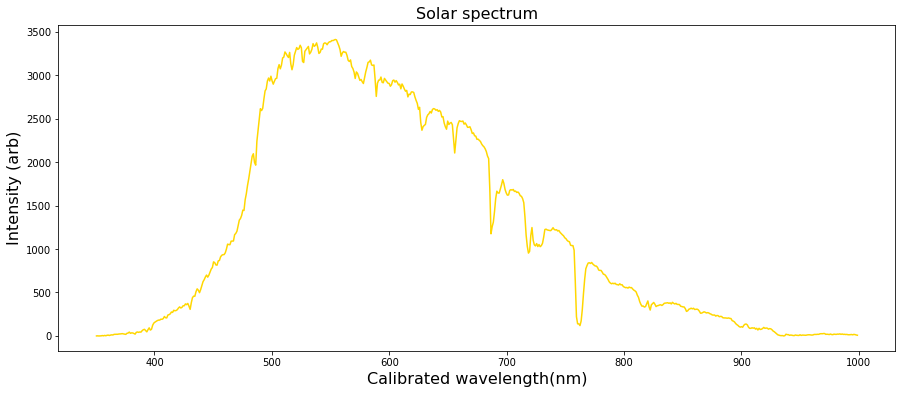

In [81]:
plt.figure(figsize=(15,6))
plt.plot(xcal,sun,c='gold')
plt.title('Solar spectrum',size=16)
plt.ylabel('Intensity (arb)',size=16)
plt.xlabel('Calibrated wavelength(nm)',size=16)

In [53]:
A=np.arange(0,651)
xcal=A*0.9970848097395049+350.64120520692995
xcal

array([350.64120521, 351.63829002, 352.63537483, 353.63245964,
       354.62954445, 355.62662926, 356.62371407, 357.62079888,
       358.61788368, 359.61496849, 360.6120533 , 361.60913811,
       362.60622292, 363.60330773, 364.60039254, 365.59747735,
       366.59456216, 367.59164697, 368.58873178, 369.58581659,
       370.5829014 , 371.57998621, 372.57707102, 373.57415583,
       374.57124064, 375.56832545, 376.56541026, 377.56249507,
       378.55957988, 379.55666469, 380.5537495 , 381.55083431,
       382.54791912, 383.54500393, 384.54208874, 385.53917355,
       386.53625836, 387.53334317, 388.53042798, 389.52751279,
       390.5245976 , 391.52168241, 392.51876722, 393.51585203,
       394.51293684, 395.51002165, 396.50710645, 397.50419126,
       398.50127607, 399.49836088, 400.49544569, 401.4925305 ,
       402.48961531, 403.48670012, 404.48378493, 405.48086974,
       406.47795455, 407.47503936, 408.47212417, 409.46920898,
       410.46629379, 411.4633786 , 412.46046341, 413.45

# Centroiding

In [54]:
def centroid(s,t,a,b,x1,x2):
    x1range=np.arange(-a,a+1)
    x2range=np.arange(-b,b+1)
    cen=[]
    cenval=[]
    i=0
    while i in range(0,len(s)):
        if s[i]>t:
            M=[]
            Mx=()
            for j in x1range:
                M.append(s[i+j])
                if np.max(M)==s[i+j]:
                    Mx=i+j  
            i+=b
            A=[]
            B=[]
            for j in x2range:
                A.append((Mx-j)*(s[Mx-j]))
                B.append(s[Mx-j])
            C=np.sum(A)/np.sum(B)
            cen.append(C)
            cenval.append(s[Mx])
        else:
            i+=1
    plt.plot(s)
    plt.plot(cen,cenval,'+')
    plt.xlim(x1,x2)
    return(cen)
    #plt.show()

# Linear least squares fitting

In [55]:
def llsfit(x,y,N):
    
    #Apply equation 2 to solve for m and c of ideal fit
    ma=np.array([[np.sum(x**2),np.sum(x)],[np.sum(x),N]])
    mc=np.array([[np.sum(x*y)],[np.sum(y)]])
    mai=np.linalg.inv(ma)
    md=np.dot(mai,mc)
    m=md[0,0]
    c=md[1,0]
    
    #Plot projected data points with fit
    X=np.arange(700,dtype=float)
    Y=m*X+c
    plt.plot(x,y,'.')
    plt.plot(X,Y)
    print('m =',m,'c =',c)
    
    return(m,c)

# Sum of squared residuals

In [56]:
def res(x,y,m,c):
    
    #Apply equation 1 to find sum of square residuals
    r=(y-((m*x)+c))**2
    print(r)
    
    return(r)

[0.00220883 0.00116221 0.01268034 0.00099336]


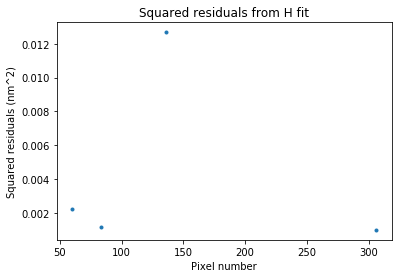

In [57]:
rH=res(Hpix,Hnm,0.9984081457815428, 350.64701960013304)
plt.plot(Hpix,rH,'.')
plt.xlabel('Pixel number')
plt.ylabel('Squared residuals (nm^2)')
plt.title('Squared residuals from H fit')
plt.show()

[0.12210166 0.00972674 0.05396479 0.02504256 0.00389922 0.07816587
 0.00193895 0.64585752 0.21062206 0.02315061 0.12653362 0.00487441
 0.01335132 0.00643299]


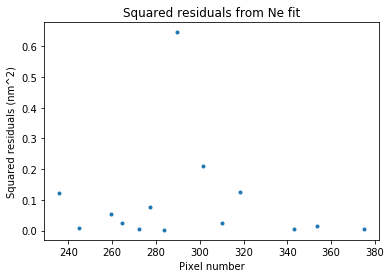

In [59]:
rHe=res(Nepix,Nenm,1.0002214585208833,349.65919129690883)
plt.plot(Nepix,rHe,'.')
plt.xlabel('Pixel number')
plt.ylabel('Squared residuals (nm^2)')
plt.title('Squared residuals from Ne fit')
plt.show()

In [105]:
rH

array([0.00220883, 0.00116221, 0.01268034, 0.00099336])

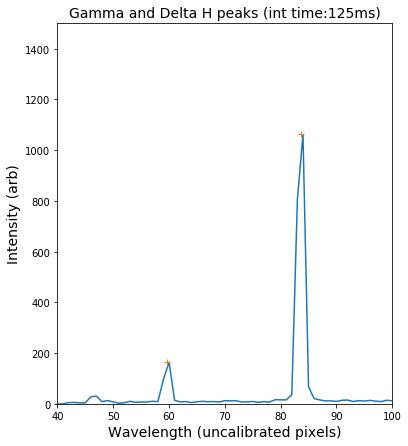

(0, 4000)

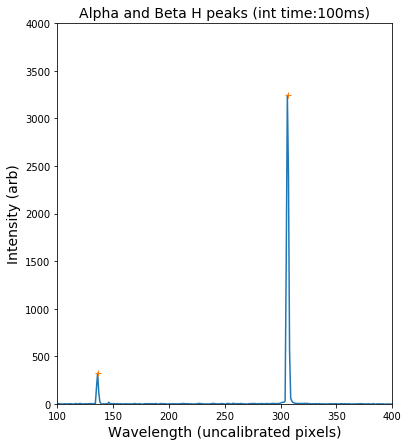

In [60]:
plt.figure(figsize=(6,7))
centroid(H2125,100,4,4,40,100)
plt.ylabel('Intensity (arb)',size=14)
plt.xlabel('Wavelength (uncalibrated pixels)',size=14)
plt.title('Gamma and Delta H peaks (int time:125ms)',size=14)
plt.ylim(0,1500)
plt.show()
plt.figure(figsize=(6,7))
centroid(H2100,100,4,4,100,400)
plt.ylabel('Intensity (arb)',size=14)
plt.xlabel('Wavelength (uncalibrated pixels)',size=14)
plt.title('Alpha and Beta H peaks (int time:100ms)',size=14)
plt.ylim(0,4000)

In [94]:
np.mean(rH)

0.004261185343550272

In [93]:
np.mean(rHe)

0.09469016627791195

In [95]:
Nepix

array([235.887, 244.671, 259.667, 264.43 , 272.071, 277.209, 283.765,
       289.698, 301.386, 310.015, 318.454, 343.142, 353.388, 374.854])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


[306.1485153627679,
 346.38494688693163,
 356.5468925233644,
 377.3029675066314,
 388.2682740299469,
 400.84272234772,
 400.84272234772,
 413.4722250060726,
 422.37348011746803,
 444.9115450464417,
 451.12177158304337,
 461.288406755352,
 461.288406755352,
 476.5346358479265,
 491.9211991808658,
 491.9211991808658,
 502.2439268205845,
 562.4304611079145,
 572.490343608058]

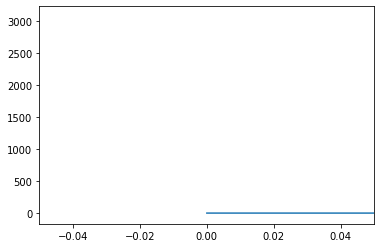

In [61]:
centroid(Uu227,100,4,4,0,0)

In [50]:
Uu227p=np.array([

Uu227cal=(Uu227p*0.9970848097395049)+350.64120520692995
Uu227cal

array([655.8972394 , 696.01637407, 706.1486957 , 726.84426278,
       737.77760335, 750.31539475, 762.90808001, 771.78338627,
       794.25574845, 800.447871  , 810.58486849, 825.78665193,
       841.1283605 , 851.42099542, 911.43207451, 921.46263054])

In [51]:
Arlines=np.array([655.773,696.543,706.722,726.517,738.398,750.387,763.510,772.376,794.818,800.616,
                 810.369,826.452,840.821,852.144,912.296,922.449])

<function matplotlib.pyplot.show(*args, **kw)>

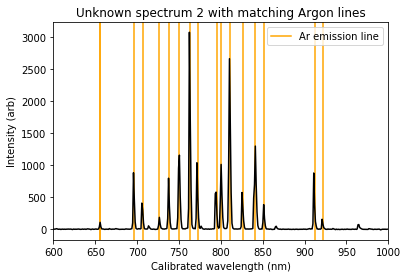

In [64]:
#plt.figure(figsize=(4,6))
for i in Arlines:
    plt.axvline(x=i,c='orange')
plt.axvline(x=Arlines[0],c='orange',label='Ar emission line')
plt.plot(xcal,Uu227,c='black')
plt.legend()
plt.xlim(600,1000)
plt.title('Unknown spectrum 2 with matching Argon lines')
plt.xlabel('Calibrated wavelength (nm)')
plt.ylabel('Intensity (arb)')
plt.show

In [ ]:
plt.plot(U2100)
plt.plot(U1100,alpha=.5)
plt.show()

In [ ]:
plt.plot(H2125)
plt.plot(H2100)
#plt.xlim(250,350)

In [15]:
centroid(H2100,100,4,4,100,400)
plt.ylim(0,4000)

NameError: name 'centroid' is not defined

In [16]:
centroid(U1100,100,3,3,0,500)

NameError: name 'centroid' is not defined

In [17]:
u1100p=np.array([38.27176502705118,96.755518313524,142.02254496625326,
                 151.48801224025263,237.69844328830413,318.0310342055023,
                 356.84373426587234,378.438907700111])

u1100cal=(u1100p*0.9970848097395049)+350.64120520692995
u1100cal

array([388.80140076, 447.11466278, 492.24972743, 501.68760107,
       587.64671231, 667.74511844, 706.44467209, 727.97689149])

In [18]:
Helines=np.array([388.864,447.147,492.193,501.567,587.562,667.815,706.519,728.135])

<function matplotlib.pyplot.show(*args, **kw)>

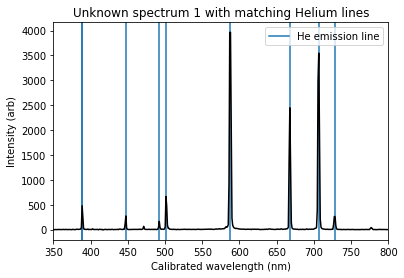

In [66]:
#plt.figure(figsize=(10,4))
for i in Helines:
    plt.axvline(x=i)
plt.axvline(x=Helines[0],label='He emission line')
plt.plot(xcal,U1100,c='black')
plt.legend()
plt.xlim(350,800)
plt.title('Unknown spectrum 1 with matching Helium lines')
plt.xlabel('Calibrated wavelength (nm)')
plt.ylabel('Intensity (arb)')
plt.show

In [ ]:
Upix=np.array([38.267562084473994,96.73746042144342,151.52580170638421,237.69913667435762,318.033221102809,356.84450123469713,378.434880461443])

In [ ]:
Unme=Upix+350.63684181409735
Unme

In [20]:
centroid(H2125)

NameError: name 'centroid' is not defined

In [21]:
centroid(N1,200,3,3,200,420)
plt.xlim(200,400)

plt.show()

NameError: name 'centroid' is not defined

In [22]:
centroid(N2100,200,3,3,200,420)
plt.ylabel('Intensity (arb)')
plt.xlabel('Wavelength (uncalibrated pixels)')
plt.title('Ne peaks (int time:100ms)')
plt.show()

NameError: name 'centroid' is not defined

In [23]:
Hpix=np.array([59.69,83.62,135.95,306.27])
Hnm=np.array([410.289,434.168,486.268,656.461])

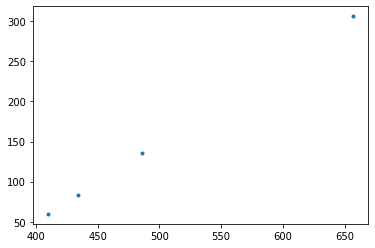

In [24]:
plt.plot(Hnm,Hpix,'.')

In [25]:
49.074412532637076,
99.10286284953395,
182.00681089743588,
222.03941908713693,
247.4026359143328,
279.00461796809407,
307.9240310077519,
375.81057393271135

32.07637655417407,
82.01126834381552,
164.9196534068531,
204.98135874067938,
229.56480139170773,
261.0221546481321,
289.8492063492063,
357.76214677780035

357.76214677780035

In [26]:
llsfit(Hpix,Hnm,4)
plt.xlim(0,400)
plt.ylim(350,750)
plt.xlabel('Uncalibrated pixels')
plt.ylabel('True wavelength (nm)')
plt.title('Linear least squares fit of H peaks')
plt.show()

NameError: name 'llsfit' is not defined

In [27]:
llsfit(Nepix,Nenm,14)
plt.xlim(200,450)
plt.ylim(550,800)
plt.xlabel('Uncalibrated pixels')
plt.ylabel('True wavelength (nm)')
plt.title('Linear least squares fit of Ne peaks')
plt.show()

NameError: name 'llsfit' is not defined

In [28]:
Hpix

array([ 59.69,  83.62, 135.95, 306.27])

In [29]:
Nepix=np.array([235.887,244.671,259.667,264.430,272.071,277.209,283.765,289.698,301.386,310.015,318.454,343.142,
 353.388,374.854])
Nenm=np.array([585.249, 594.483, 609.616, 614.306, 621.728, 626.65 , 633.443,
       640.225, 650.653, 659.895, 667.828, 692.947,703.241, 724.516])

In [30]:
Spix=np.array([])
Spix=np.append(Spix,Hpix)
Spix=np.append(Spix,Nepix)
Snm=np.array([])
Snm=np.append(Snm,Hnm)
Snm=np.append(Snm,Nenm)
Snm=np.append(Snm,Helines)
Snm=np.append(Snm,Arlines)

In [85]:

Spix=np.append(Spix,u1100p)
Spix=np.append(Spix,Uu227p)

In [32]:
llsfit(Spix,Snm,42)
#plt.xlim(200,450)
#plt.ylim(550,800)
plt.xlabel('Uncalibrated pixels',size=14)
plt.ylabel('True wavelength (nm)',size=14)
plt.title('Linear least squares fit of combined peaks',size=14)
plt.show()

NameError: name 'llsfit' is not defined

In [33]:
#plt.figure(figsize=(6,5))
rS=res(Spix,Snm,0.9984152760987755, 350.3620881709221)
plt.plot(Spix,rS,'.',label='linear fit')
plt.plot(Spix,Res2,'.',c='orange',label='quadratic fit')
#plt.plot(Spix,Res3,'.',c='y')
plt.title('Least square residuals of all combined peaks',size=14)
plt.xlabel('Pixel number',size=14)
plt.ylabel('Squared residuals (nm^2)',size=14)
#plt.ylim(0,5)
plt.legend()
plt.show()

NameError: name 'res' is not defined

In [34]:
a=np.polyfit(Spix,Snm,2)[0]
b=np.polyfit(Spix,Snm,2)[1]
C=np.polyfit(Spix,Snm,2)[2]

In [35]:
d=np.polyfit(Spix,Snm,3)[0]
e=np.polyfit(Spix,Snm,3)[1]
f=np.polyfit(Spix,Snm,3)[2]
g=np.polyfit(Spix,Snm,3)[3]

In [36]:
Spixf3=d*(Spix**3)+e*(Spix**2)+f*(Spix)+g
Res3=(Spixf3-Snm)**2

In [37]:
Spixf2=a*(Spix**2)+b*(Spix)+C
Res2=(Spixf2-Snm)**2

In [38]:
np.sum(Res2)

4.024062274686236

In [39]:
np.sum(Res3)

4.010657215740716

In [40]:
Spix=np.array([59.69      ,  83.62      , 135.95      , 306.27      ,
       235.887     , 244.671     , 259.667     , 264.43      ,
       272.071     , 277.209     , 283.765     , 289.698     ,
       301.386     , 310.015     , 318.454     , 343.142     ,
       353.388     , 374.854     ])
len(Spix)

18

m = 0.9984152760987755 c = 350.3620881709221


(0.9984152760987755, 350.3620881709221)

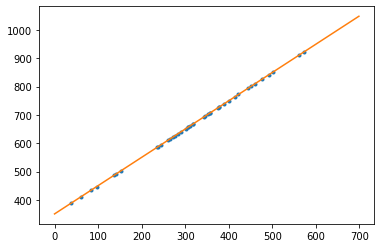

In [87]:
llsfit(Spix,Snm,42)

In [88]:
rS=res(Spix,Snm,0.9971845108093014, 350.63684181409735)
np.mean(rS)
#plt.plot(Spix,rS,'.')
#plt.ylim(0,5)

[1.69558774e-02 2.14884499e-02 4.08627028e-03 1.73437316e-01
 3.72960005e-01 1.84887270e-02 1.87037373e-03 2.67061206e-04
 4.57227790e-02 1.72526315e-01 2.55694568e-02 4.98153320e-01
 2.71746172e-01 1.34564796e-02 1.34130287e-01 1.80286418e-02
 4.45709282e-02 6.48920002e-03 3.98753093e-03 7.31918285e-04
 4.42542131e-03 1.72505091e-02 1.08259248e-02 1.80938952e-03
 1.85878221e-03 1.55603519e-02 2.26199618e-02 2.46466944e-01
 2.93893644e-01 1.29972431e-01 3.43453764e-01 1.29630171e-03
 3.19292532e-01 3.07876318e-01 2.72752150e-01 1.62600942e-02
 6.63042139e-02 3.87133405e-01 1.23933694e-01 4.58726773e-01
 6.59691520e-01 8.71711569e-01]


0.15280435245638044

In [89]:
np.mean(rH)

0.004261185343550272

In [90]:
np.mean(rHe)

0.09469016627791195

In [99]:
np.mean(rS)

0.15280435245638044

In [102]:
np.mean(Res2)

0.09581100654014849